# Validation of optimization with OPAL


In [1]:
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from bellotti_r_master_thesis.plot_optimisation_results import draw_confidence_intervals
from mllib.data import OpalDataSource

# Load data

In [2]:
opal_validation_dir = '/data/user/boiger_r/invertible_network_paper_results5000/models_30_11_2020/isodar/optimisation_paper_7/forward_model_validation'
out_dir = '/data/user/boiger_r/invertible_network_paper_results5000/models_30_11_2020/isodar/optimisation_paper_7'
data_dir_fw = '/data/user/boiger_r/invertible_network_paper_results5000/models_30_11_2020/isodar/optimisation_paper_7/forward_model/dE__emit_x'
data_dir_iv = '/data/user/boiger_r/invertible_network_paper_results5000/models_30_11_2020/isodar/optimisation_paper_7/invertible_model2/dE__emit_x'

dvar999_fw = pd.read_hdf(f'{data_dir_fw}/gen_{999}.hdf5', key='dvar')
qoi999_fw = pd.read_hdf(f'{data_dir_fw}/gen_{999}.hdf5', key='obj')
dvar999_iv = pd.read_hdf(f'{data_dir_iv}/gen_{999}.hdf5', key='dvar')
qoi999_iv = pd.read_hdf(f'{data_dir_iv}/gen_{999}.hdf5', key='obj')


# Choose optimal DVAR to validate with OPAL

In [3]:
indexlist_opal= list(range(100,200))

In [4]:
indexlist_opal

[100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199]

In [5]:
dvar_to_opal_fw = []
qoi_to_opal_fw = []
dvar_to_opal_iv = []
qoi_to_opal_iv = []
for i in indexlist_opal:
    dvar_to_opal_fw.append(pd.DataFrame(dvar999_fw.iloc[i]).T)
    qoi_to_opal_fw.append(pd.DataFrame(qoi999_fw.iloc[i]).T)
    dvar_to_opal_iv.append(pd.DataFrame(dvar999_iv.iloc[i]).T)
    qoi_to_opal_iv.append(pd.DataFrame(qoi999_iv.iloc[i]).T)
dvar_to_opal_fw = pd.concat(dvar_to_opal_fw)
qoi_to_opal_fw = pd.concat(qoi_to_opal_fw)
dvar_to_opal_iv = pd.concat(dvar_to_opal_iv)
qoi_to_opal_iv = pd.concat(qoi_to_opal_iv)
dvar_to_opal_fw

pr0          r0       rfphi    sigmax    sigmay   sigmaz
100  0.002335  115.900007  283.172645  0.001021  0.003150  0.00525
101  0.002330  115.900014  283.706885  0.000977  0.003076  0.00525
102  0.002329  115.900012  283.743527  0.000972  0.003051  0.00525
103  0.002335  115.900014  283.200393  0.001024  0.003150  0.00525
104  0.002330  115.900011  283.700748  0.000974  0.003081  0.00525
..        ...         ...         ...       ...       ...      ...
195  0.002329  115.909301  283.836891  0.000966  0.003008  0.00525
196  0.002331  115.900020  283.608407  0.000985  0.003137  0.00525
197  0.002334  115.900004  283.286303  0.001020  0.003150  0.00525
198  0.002336  115.900017  283.079808  0.001024  0.003150  0.00525
199  0.002330  115.900003  283.700748  0.000978  0.003082  0.00525

[100 rows x 6 columns]

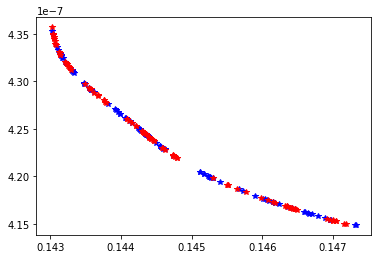

In [6]:
x_col = 'dE'
y_col = 'emit_x'
plt.plot(qoi_to_opal_fw[x_col],qoi_to_opal_fw[y_col],'b*')
plt.plot(qoi_to_opal_iv[x_col],qoi_to_opal_iv[y_col],'r*')

In [7]:
out_file_fw = f'{out_dir}/forward_model_validation/selected_non_dominated100fw1.hdf5'
out_file_iv = f'{out_dir}/forward_model_validation/selected_non_dominated100iv1.hdf5'

#qoi_to_opal_fw.to_hdf(out_file_fw,key='obj')
#dvar_to_opal_fw.to_hdf(out_file_fw,key='dvar')
#qoi_to_opal_iv.to_hdf(out_file_iv,key='obj')
#dvar_to_opal_iv.to_hdf(out_file_iv,key='dvar')

In [8]:
#dvar_to_opal_fw.to_csv(f'{out_dir}/forward_model_validation/optimal_dvars100_fw1.tsv',index=False,sep='\t')
#dvar_to_opal_iv.to_csv(f'{out_dir}/forward_model_validation/optimal_dvars100_iv1.tsv',index=False,sep='\t')



# Extract OPAL data and save it in a nice format

In [14]:
src_fw = OpalDataSource(f'{opal_validation_dir}/output100_fw1',name='src',stat_file='IsoDAR60MeV.stat',use_cache=False)
dvar_fw, qoi_fw = src_fw.get_data()

src_iv = OpalDataSource(f'{opal_validation_dir}/output100_iv1',name='src',stat_file='IsoDAR60MeV.stat',use_cache=False)
dvar_iv, qoi_iv = src_iv.get_data()


Successfully extracted design variables.
Loading .stat file 0 / 100
Successfully extracted design variables.
Loading .stat file 0 / 100


In [8]:
# add column particle losses
#qoi['particle_losses']= 1.33e5-qoi['Number of Macro Particles']
#qoi.to_hdf(f'{opal_validation_dir}/objectives100_iv1.hdf5', key='qoi')
#qoi_fw.to_hdf(f'{opal_validation_dir}/objectives100_fw1.hdf5', key='qoi')
#qoi_iv.to_hdf(f'{opal_validation_dir}/objectives100_iv1.hdf5', key='qoi')

In [15]:
qoi_fw.keys()

Index(['Time', 'Number of Macro Particles', 'Bunch Charge',
       'Mean Bunch Energy', 'RMS Beamsize in x', 'RMS Beamsize in y',
       'RMS Beamsize in s', 'RMS Normalized Momenta in x',
       'RMS Normalized Momenta in y', 'RMS Normalized Momenta in s',
       'Normalized Emittance x', 'Normalized Emittance y',
       'Normalized Emittance s', 'Mean Beam Position in x',
       'Mean Beam Position in y', 'Mean Beam Position in s',
       'x coordinate of reference particle in lab cs',
       'y coordinate of reference particle in lab cs',
       'z coordinate of reference particle in lab cs',
       'x momentum of reference particle in lab cs',
       'y momentum of reference particle in lab cs',
       'z momentum of reference particle in lab cs', 'Max Beamsize in x',
       'Max Beamsize in y', 'Max Beamsize in s', 'Correlation xpx',
       'Correlation ypy', 'Correlation zpz', 'Dispersion in x',
       'Derivative of dispersion in x', 'Dispersion in y',
       'Derivative of disp

In [16]:
x_col1 = 'energy spread of the beam'
y_col1 = 'Normalized Emittance x'

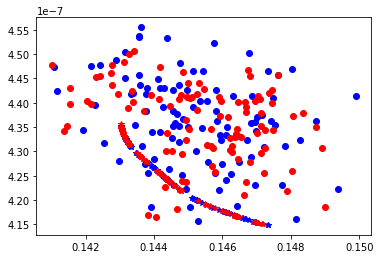

In [17]:
plt.plot(qoi_fw[x_col1],qoi_fw[y_col1],'bo')
plt.plot(qoi_to_opal_fw[x_col],qoi_to_opal_fw[y_col],'b*')
plt.plot(qoi_to_opal_iv[x_col],qoi_to_opal_iv[y_col],'r*')
plt.plot(qoi_iv[x_col1],qoi_iv[y_col1],'ro')